<div style="background-color:#fff3cd; padding:10px; border-radius:8px; text-align:center; font-size:22px; font-weight:bold;>
\text{Model Development}
</div>


#### Objectives

* Develop prediction models
* <p>we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p><p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<div style="background-color:#fff3cd; padding:10px; border-radius:8px; text-align:center; font-size:22px; font-weight:bold;">
Model Evaluation and Refinement
</div>


## Objectives

* Evaluate and refine prediction models

<h5>Table of Contents</h5>
<ul>
    <li>Model Evaluation </a></li>
    <li>Over-fitting, Under-fitting and Model Selection </a></li>
    <li>Ridge Regression </a></li>
    <li>Grid Search</a></li>
</ul>


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import requests
import warnings

In [3]:
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"
response = requests.get(file_path)
filename = ("usedcars.csv")

with open (filename , "wb") as f:
    f.write(response.content)

In [18]:
df = pd.read_csv(filename, header=0)
df= df._get_numeric_data()



df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


<h3 id="ref1">Part 1: Training and Testing</h3>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [21]:
y_data = df['price']

x_data=df.drop('price',axis=1)

In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1) # split up the dataset such that 10% of the data samples will be utilized for testing.Random_state equal = 1

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])



x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)  # Split up the dataset such that 40% of the data samples will be utilized for testing.Random_state = 0
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 21
number of training samples: 180
number of test samples : 81
number of training samples: 120


In [31]:
lre=LinearRegression()

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [30]:
lre.score(x_test[['horsepower']], y_test) # Let's calculate the R^2 on the test data

0.36358755750788263

In [29]:
lre.score(x_train[['horsepower']], y_train)  # We can see the R^2 is much smaller using the test data compared to the training data

0.6619724197515104

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)  #  R^2 on the test data using 40% of the dataset for testing
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

<b> Sometimes we do not have sufficient testing data; as a result, we may want to perform cross-validation. Several methods that we can use for cross-validation </b>

<h3>Cross-Validation Score</h3>

In [34]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [36]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std()) #We can calculate the average and standard deviation of our estimate

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


In [37]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error') # We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.7224759 ])

<b>We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.</b>


In [39]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h3 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h3>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [41]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [42]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


In [44]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)  # Let's use 55 percent of the data for training and the rest for testing


In [45]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [92]:
lm.fit(Z, df['price'])

LinearRegression()

In [47]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.58615619,  7307.91973653, 12213.73734432, 18893.37966315,
       19996.10669225])

In [51]:
print("Predicted values:", yhat[0:5])
print("True values:", y_test[0:5].values)   # Let's take the first five predicted values and compare it to the actual targets.

Predicted values: [ 6728.58615619  7307.91973653 12213.73734432 18893.37966315
 19996.10669225]
True values: [ 6295. 10698. 13860. 13499. 15750.]


<h3>Functions for Plotting</h3>


In [53]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [54]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

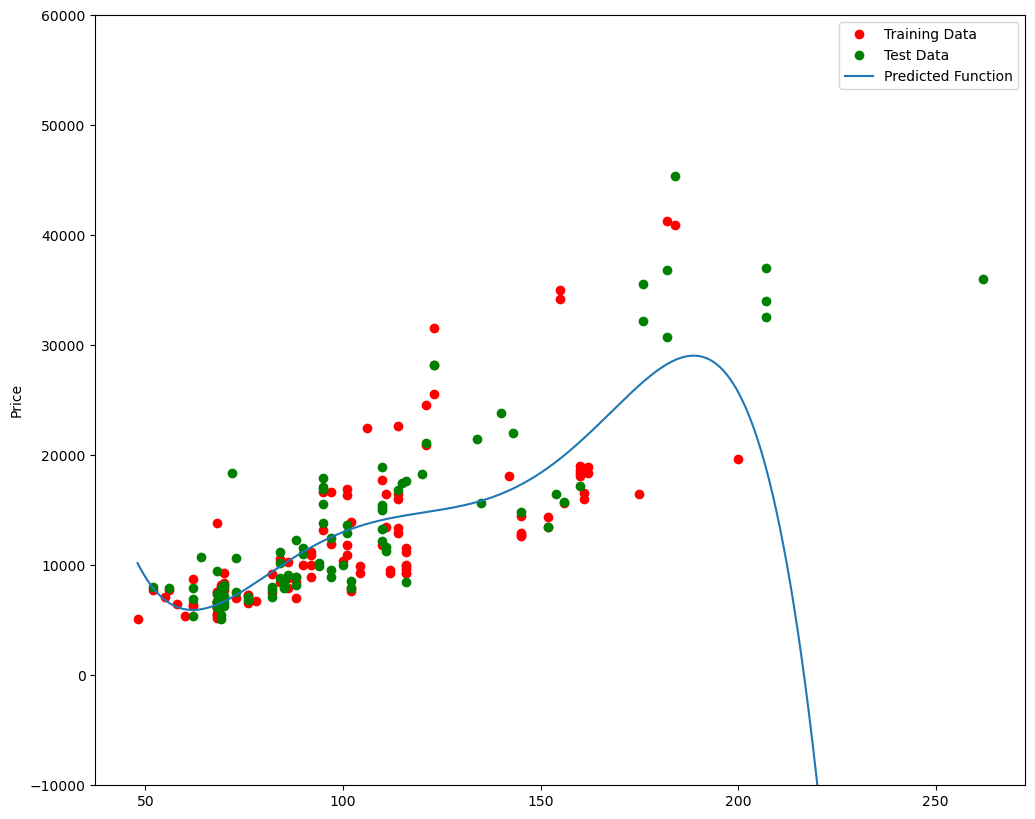

In [55]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [56]:
poly.score(x_train_pr, y_train)  # R^2 of the training data

0.5567716897727109

In [57]:
poly.score(x_test_pr, y_test)  # R^2 of the test data

-29.870994900857237

Text(3, 0.75, 'Maximum R^2 ')

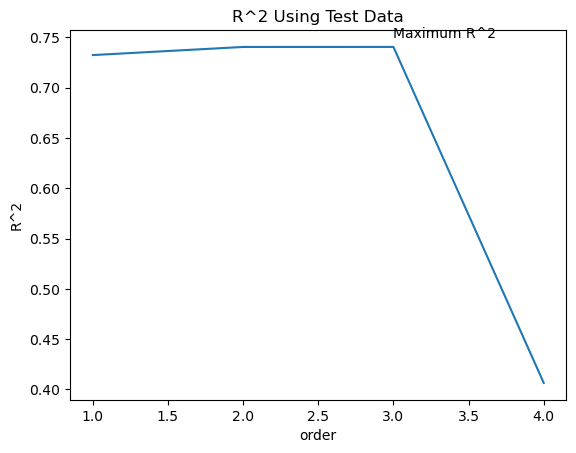

In [59]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75,'Maximum R^2 ')    

<h3>Part 3: Ridge Regression</h2> 

In [62]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [67]:
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=1)

RigeModel.fit(x_train_pr, y_train)

yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [68]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.73it/s, Test Score=0.564, Train Score=0.859]


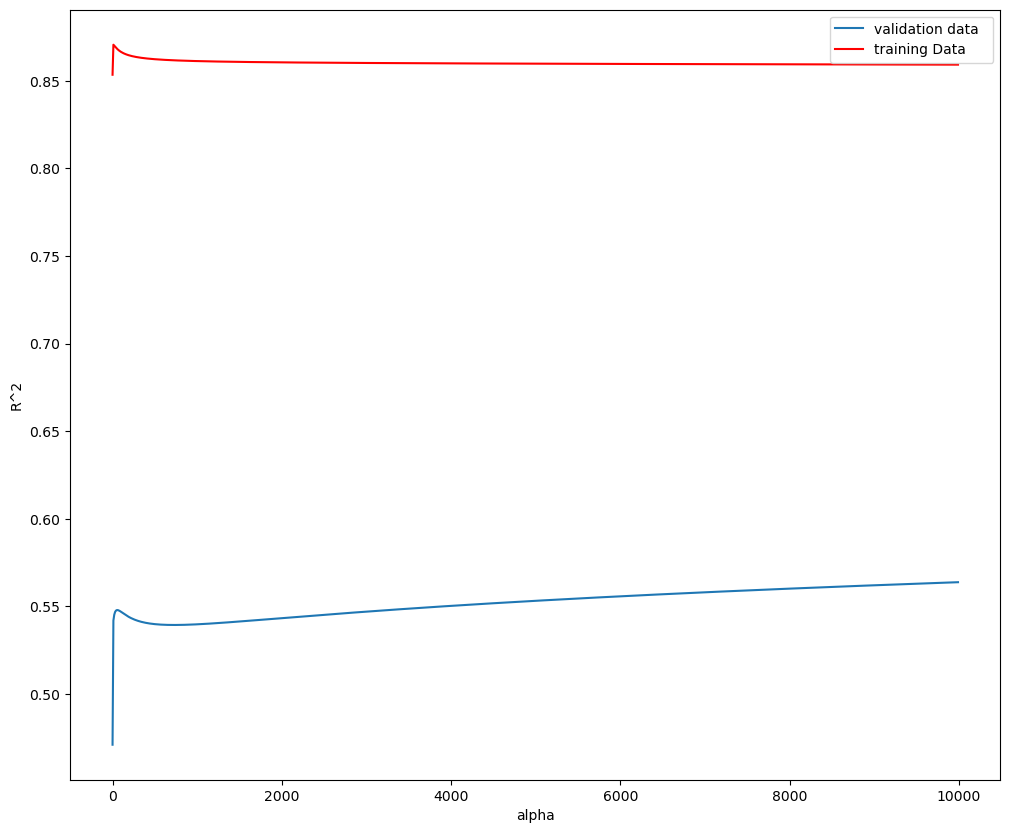

In [69]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h3>Part 4: Grid Search</h3>


In [76]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

RR=Ridge()
RR

Ridge()

In [77]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [78]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [79]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [80]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Define parameter grid without 'normalize'
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

# Perform Grid Search
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_scaled, y_data)

# Best model
best_ridge_model = Grid2.best_estimator_
best_alpha = Grid2.best_params_['alpha']
best_alpha

100